# Спектральная кластеризация

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Макрушин С.В. 'Лекция 5: Выявление сообществ в сетях 2. Спектральные методы'
* Документация:
    * https://networkx.org/documentation/stable/reference/generated/networkx.linalg.laplacianmatrix.laplacian_matrix.html
    * https://numpy.org/doc/stable/reference/generated/numpy.linalg.eig.html
    * https://networkx.org/documentation/stable/reference/generated/networkx.linalg.laplacianmatrix.normalized_laplacian_matrix.html
    * http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
    * http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.radius_neighbors_graph.html
    * http://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html

## Вопросы для совместного обсуждения

1\. Обсудите основные шаги алгоритмов спектральной кластеризации.

## Задачи для самостоятельного решения

In [133]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.neighbors import radius_neighbors_graph
from sklearn.cluster import SpectralClustering

<p class='task' id='1'></p>

1\. Загрузите граф карате клуба. Вычислите матрицу Лапласа $\mathbf{L}=\mathbf{D}-\mathbf{A}$ при помощи готовой функции. Найдите собственные значения и собственные векторы матрицы Лапласа. При использовании функции явно укажите, что используется невзвешенная матрица смежности.

Выделите собственный вектор $\mathbf{u}$, отвечающий минимальному ненулевому с.з. $\lambda_i \ne 0$ и выведите его на экран. Преобразуйте $\mathbf{u}$ в индикаторный вектор $\mathbf{f}$ по правилу $\mathbf{f}_i$ = sign($\mathbf{u}_{i})$.

Визуализируйте $\mathbf{u}$: по горизонтали откладывается номер узла, по вертикали значение соответствующей координаты вектора $\mathbf{u}$

Визуализируйте граф, обозначив цветом узла компоненту, в которую попадает узел в соответствии с найденным разрезом.

- [ ] Проверено на семинаре

In [90]:
G = nx.karate_club_graph()
L = nx.laplacian_matrix(G, weight=None).toarray()
L

array([[16, -1, -1, ..., -1,  0,  0],
       [-1,  9, -1, ...,  0,  0,  0],
       [-1, -1, 10, ...,  0, -1,  0],
       ...,
       [-1,  0,  0, ...,  6, -1, -1],
       [ 0,  0, -1, ..., -1, 12, -1],
       [ 0,  0,  0, ..., -1, -1, 17]], dtype=int32)

In [91]:
eigenvals, eigenvects = np.linalg.eig(L)
u = eigenvects[eigenvals[~np.isclose(eigenvals, 0)].argmin()]
ixs = np.where(~np.isclose(eigenvals, 0))[0]
min_ix = ixs[np.abs(eigenvals[ixs]).argmin()]
u = eigenvects[:, min_ix]
u

array([-0.11213743, -0.04128789,  0.02321896, -0.05549978, -0.28460453,
       -0.32372722, -0.32372722, -0.052586  ,  0.05160128,  0.09280089,
       -0.28460453, -0.21099295, -0.1094613 , -0.01474197,  0.16275078,
        0.16275078, -0.42276533, -0.10018142,  0.16275078, -0.01363713,
        0.16275078, -0.10018142,  0.16275078,  0.15569457,  0.15302558,
        0.16096292,  0.18710956,  0.12766405,  0.0951523 ,  0.16765031,
        0.07349964,  0.09875343,  0.13034546,  0.11890326])

In [92]:
f = np.sign(u)
f

array([-1., -1.,  1., -1., -1., -1., -1., -1.,  1.,  1., -1., -1., -1.,
       -1.,  1.,  1., -1., -1.,  1., -1.,  1., -1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

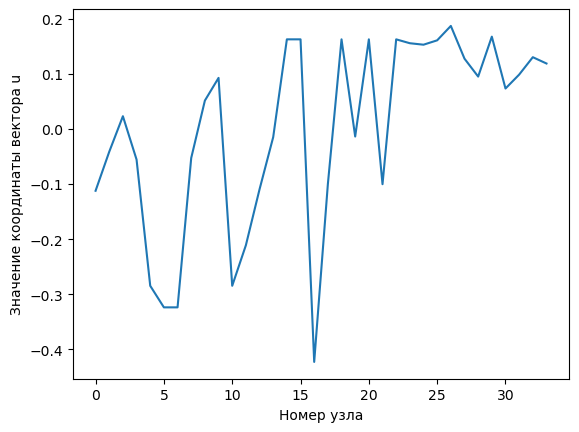

In [93]:
plt.plot(u)
plt.xlabel('Номер узла')
plt.ylabel('Значение координаты вектора u')
plt.show()

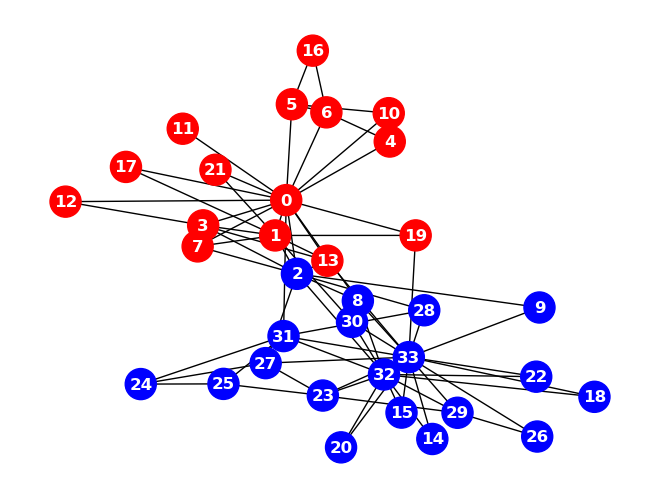

In [94]:
node_colors = ['red' if i==-1 else 'blue' for i in f]

pos = nx.spring_layout(G, seed=0) 
nx.draw(G, pos=pos, node_color=node_colors, with_labels=True, font_color='w', font_weight='bold', node_size=500)
plt.show()

<p class='task' id='2'></p>

2\. Повторите предыдущую задачу, используя нормализованную матрицу Лапласа $\mathbf{L}_{sym}=\mathbf{D^{-\frac{1}{2}}}\mathbf{L}\mathbf{D^{-\frac{1}{2}}}$. При расчете матрицы Лапласа явно укажите, что используется взвешенная матрица смежности $\mathbf{W}$.


- [ ] Проверено на семинаре

In [95]:
G = nx.karate_club_graph()
L = nx.normalized_laplacian_matrix(G, weight='weight').toarray()
L

array([[ 1.        , -0.11461365, -0.13430383, ..., -0.0673435 ,
         0.        ,  0.        ],
       [-0.11461365,  1.        , -0.19395246, ...,  0.        ,
         0.        ,  0.        ],
       [-0.13430383, -0.19395246,  1.        , ...,  0.        ,
        -0.05647825,  0.        ],
       ...,
       [-0.0673435 ,  0.        ,  0.        , ...,  1.        ,
        -0.14159847, -0.12598816],
       [ 0.        ,  0.        , -0.05647825, ..., -0.14159847,
         1.        , -0.11707323],
       [ 0.        ,  0.        ,  0.        , ..., -0.12598816,
        -0.11707323,  1.        ]])

In [96]:
eigenvals, eigenvects = np.linalg.eig(L)
u = eigenvects[eigenvals[~np.isclose(eigenvals, 0)].argmin()]
ixs = np.where(~np.isclose(eigenvals, 0))[0]
min_ix = ixs[np.abs(eigenvals[ixs]).argmin()]
u = eigenvects[:, min_ix]
u

array([-0.28814558, -0.14084241, -0.06725901, -0.13436137, -0.23229627,
       -0.35714964, -0.34138202, -0.10452288,  0.05403598,  0.04118929,
       -0.24697876, -0.08653547, -0.07836028, -0.07671608,  0.1011621 ,
        0.11743498, -0.26166942, -0.0746579 ,  0.0760567 , -0.05207837,
        0.09197806, -0.07934999,  0.0989321 ,  0.22645795,  0.12551549,
        0.18315111,  0.13037628,  0.14553304,  0.05886632,  0.18839478,
        0.07654081,  0.1753748 ,  0.25912862,  0.26049118])

In [97]:
f = np.sign(u)
f

array([-1., -1., -1., -1., -1., -1., -1., -1.,  1.,  1., -1., -1., -1.,
       -1.,  1.,  1., -1., -1.,  1., -1.,  1., -1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

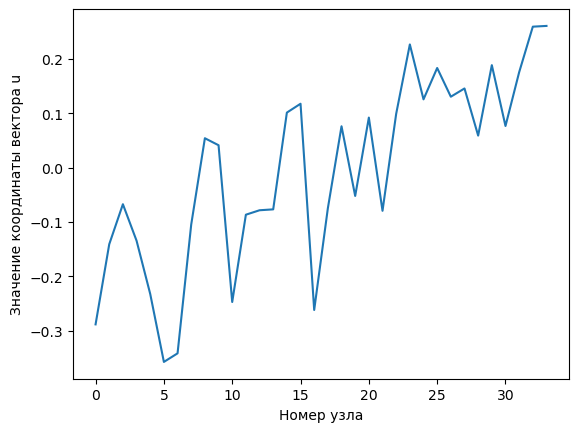

In [98]:
plt.plot(u)
plt.xlabel('Номер узла')
plt.ylabel('Значение координаты вектора u')
plt.show()

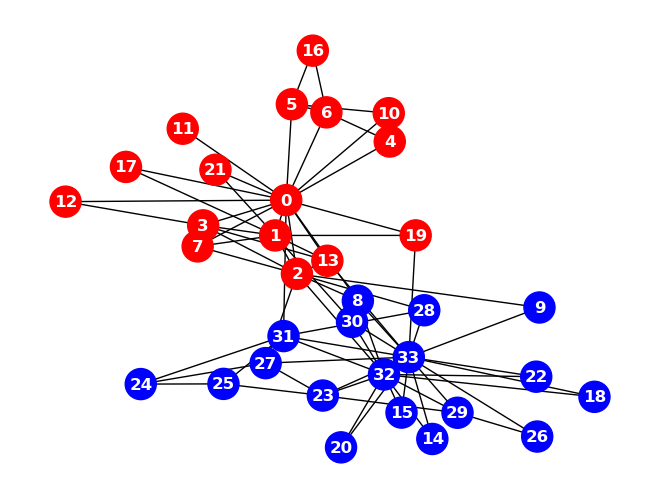

In [99]:
node_colors = ['red' if i==-1 else 'blue' for i in f]

pos = nx.spring_layout(G, seed=0) 
nx.draw(G, pos=pos, node_color=node_colors, font_color='white', font_weight='bold', with_labels=True, node_size=500)
plt.show()

<p class='task' id='3'></p>

3\. Дан набор данных `(X, y`). Визуализируйте набор данных, отрисовав точки на плоскости и раскрасив в цвета, соответствующие меткам объектов `y`. Решите задачу кластеризации данных на 3 кластера при помощи алгоритма KMeans из `sklearn`. Визуализируйте полученный результат.

- [ ] Проверено на семинаре

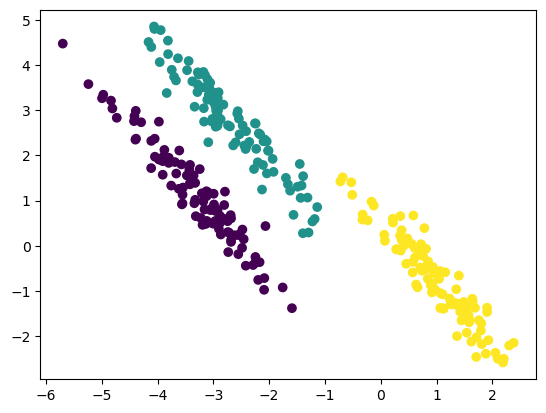

In [105]:
X, y = make_blobs(n_samples=300, random_state=170)
X = np.dot(X, [[0.6, -0.6], [-0.4, 0.8]])

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

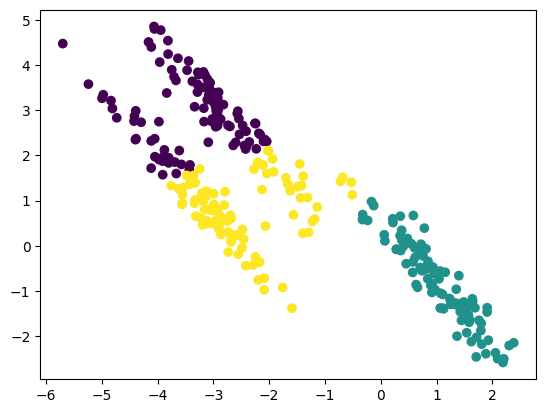

In [ ]:
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=clusters)
plt.show()

<p class='task' id='4'></p>

4\. На основе датасета из предыдущего задания создайте граф при помощи функции `radius_neighbors_graph` из `sklearn` (укажите аргумент `radius=1`). Получите матрицу $U \in \mathbb{R}^{300\times3}$, состояющую из собственных векторов матрицы Лапласа, соответствующих трем наименьшим ненулевым собственным значениям. Решите задачу кластеризации при помощи алгоритма KMeans из `sklearn` на основе матрицы $U$. Визуализируйте полученный результат.

- [ ] Проверено на семинаре

In [125]:
A = radius_neighbors_graph(X, radius=1).toarray()
D = np.diag(A.sum(axis=1))
L = D - A
L

array([[27.,  0.,  0., ...,  0., -1.,  0.],
       [ 0., 16.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0., 37., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ..., 55.,  0., -1.],
       [-1.,  0.,  0., ...,  0., 23.,  0.],
       [ 0.,  0.,  0., ..., -1.,  0., 55.]])

In [132]:
eigenvals, eigenvects = np.linalg.eig(L)
ixs = np.where(~np.isclose(eigenvals, 0))[0]
U = eigenvects[:, ixs[np.argsort(eigenvals[ixs])][:3]]
U.shape

(300, 3)

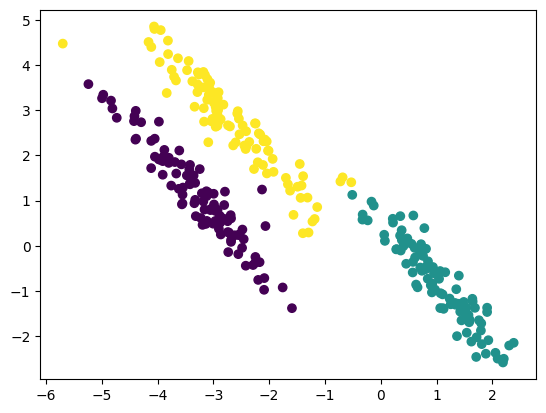

In [ ]:
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(U)

plt.scatter(X[:, 0], X[:, 1], c=clusters)
plt.show()

<p class='task' id='5'></p>

5\. Решите задачу кластеризации данных на 3 кластера при помощи алгоритма `SpectralClustering` из `sklearn`. Визуализируйте полученный результат. При создании модели кластеризации укажите значение аргумента `affinity='nearest_neighbors'`.

- [ ] Проверено на семинаре

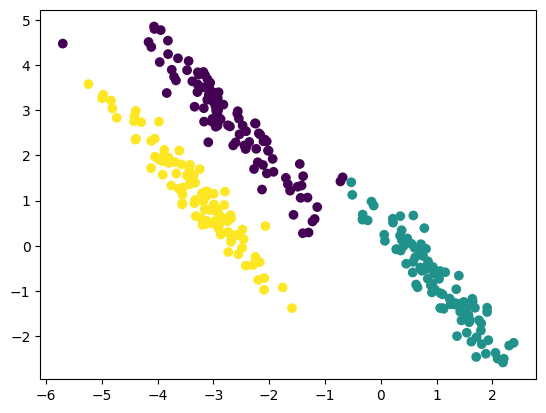

In [ ]:
model = SpectralClustering(n_clusters=3, affinity='nearest_neighbors')
clusters = model.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=clusters)
plt.show()